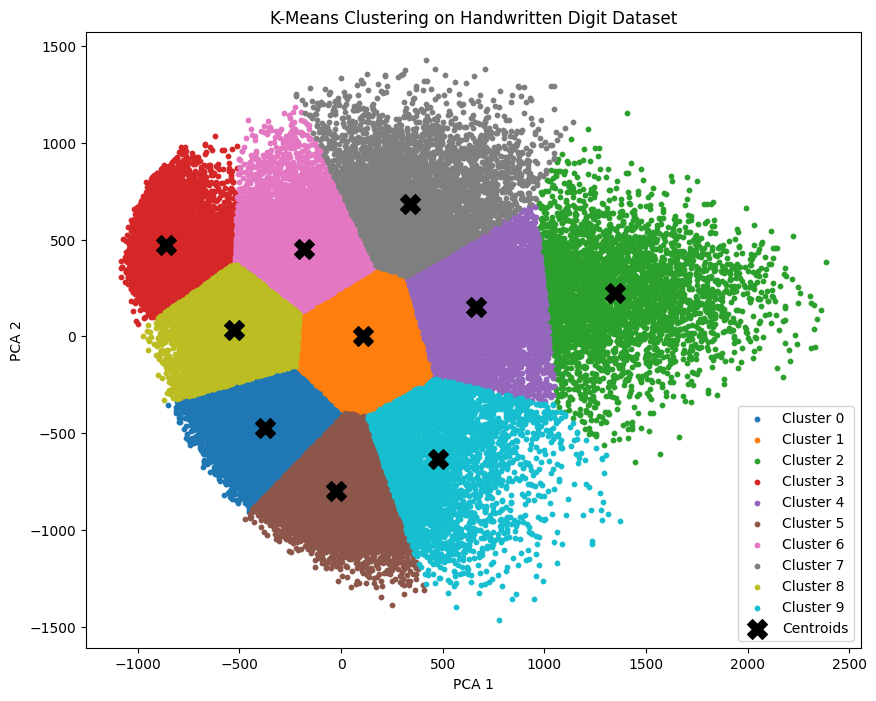

Cluster labels: [1 2 0 3 0 1 8 4 8 0 6 8 7 1 3]


In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading the MNIST dataset (handwritten digits dataset)
mnist = fetch_openml('mnist_784')

# The dataset contains 70000 images of handwritten digits (28x28 pixels each)
X = mnist.data  # The features (flattened pixel values)
y = mnist.target.astype(int)  # The true labels (digits from 0 to 9)

# We will reduce the data dimensions using PCA (Principal Component Analysis) for better visualization
pca = PCA(n_components=2)  # Reduce to 2D
X_pca = pca.fit_transform(X)

# Applying K-Means clustering with 10 clusters (since there are 10 digits)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels assigned by K-Means
labels = kmeans.labels_

# Plotting the clusters in 2D space (using PCA-reduced features)
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color
for i in range(10):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', s=10)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering on Handwritten Digit Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Print the first few cluster labels (how each data point was assigned)
print(f"Cluster labels: {labels[:15]}")  # Displaying the first 15 labels
